<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

# 5.데이터프레임 변경 (1)

- 데이터 전처리를 위해 꼭 익혀두어야 할 내용입니다.
- 반복 학습과 실습을 통해서 익숙해져야 합니다.

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

# 복습

In [31]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/tips.csv'
tip = pd.read_csv(path)

# 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
tip.tail(3)

,total_bill,tip,sex,smoker,day,time,size
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [33]:
# 일부 데이터 보기
tip[6:11]

,total_bill,tip,sex,smoker,day,time,size
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
10,10.27,1.71,Male,No,Sun,Dinner,2


In [34]:
# 범주형 데이터 값 개수
tip['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [35]:
tip.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


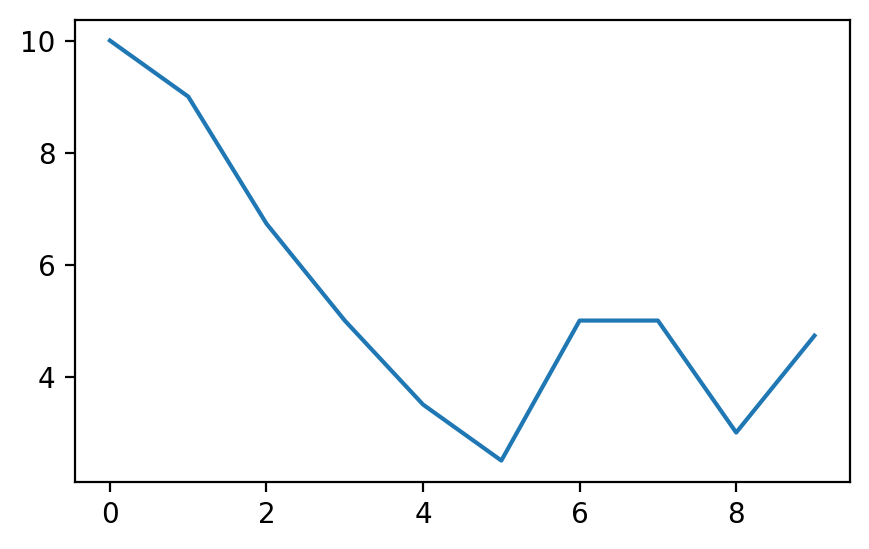

In [49]:
# 정렬 total_bill 기준 내림차순
tmp = tip.sort_values(by='total_bill', ascending=False).head(10)
tmp.reset_index(drop=True, inplace=True)
plt.figure(figsize=(5, 3))
tmp['tip'].plot()
plt.show()

In [50]:
# 개별 열 전체 집계
tip['total_bill'].mean()

19.78594262295082

In [51]:
# 그룹 별 집계 : day별 tip 평균
tmp = tip.groupby(by='day', as_index=False)[['tip']].mean()

# 열 이름 변경
#tmp.rename(columns={'tip':'tip_mean'})
tmp.columns = ['day', 'tip_mean']

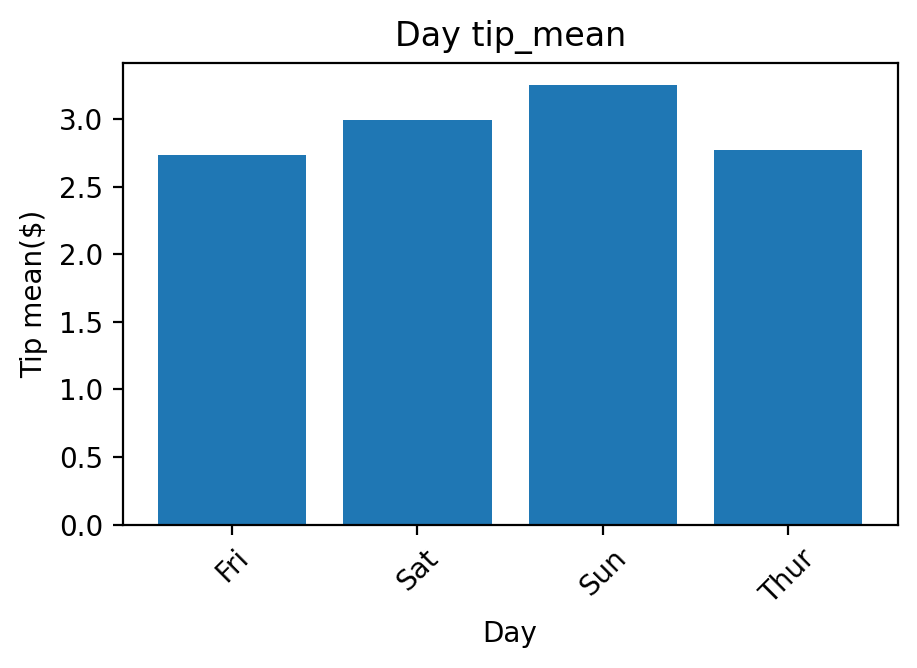

In [60]:
# 확인
plt.figure(figsize=(5, 3))
plt.bar(x=tmp['day'], height=tmp['tip_mean'])
plt.title('Day tip_mean')
plt.xlabel('Day')
plt.ylabel('Tip mean($)')
plt.xticks(rotation = 45)
plt.show()

In [73]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/tips(2).csv'
tip = pd.read_csv(path)

# 확인
tip.head()

,total_bill_amount,tip,male_female,smoke_yes_no,week_name,dinner_lunch,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 5.1.열 이름 변경

- 기존 데이터프레임의 열 이름을 적절히 변경해야 할 경우가 있습니다.
- 또는 집계 결과를 가진 열 이름을 이해하기 쉽게 변경해야 할 경우도 있습니다.

**1) 일부 열 이름 변경**

- **rename()** 메서드를 사용해 변경 전후의 열 이름을 딕셔너리 형태로 나열하는 방법으로 변경합니다.
- **inplace=True** 옵션을 설정해야 변경 사항이 실제 반영이 됩니다.
- 다음과 같이 열 이름을 변경합니다.
    - total_bill_amount → total_bill
    - male_female → sex
    - smoke_yes_no → smoker
    - week_name → day
    - dinner_lunch → time

In [89]:
# rename() 함수로 열 이름 변경
tip.rename(columns={'total_bill_amount':'total_bill',
                   'male_female': 'sex',
                   'smoke_yes_no': 'smoker',
                   'week_name': 'day',
                   'dinner_lunch': 'time'}, inplace=True)



# 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**2) 모든 열 이름 변경**

- 모든 열 이름을 변경할 때는 **columns** 속성을 변경합니다.
- 변경이 필요없는 열은 기존 이름을 부여해 변경합니다.


In [120]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/tips(2).csv'
tip = pd.read_csv(path)

# 확인
tip.head(2)

,total_bill_amount,tip,male_female,smoke_yes_no,week_name,dinner_lunch,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [121]:
# 모든 열 이름 변경:
# ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']
tip.columns = ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

# 확인
tip.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


## 5.2.열 추가

- 새로운 열을 추가하여 기존 데이터에서 계산된 결괏값을 저장해야할 경우가 있습니다.
- total_bill에 tip을 더한 값을 갖는 final_amt 열을 추가합니다.

In [100]:
# final_amt 열 추가: final_amt = total_bill + tip
tip['final_amt'] = tip['total_bill'] + tip['tip']

# 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size,final_amt
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20


- insert() 메서드를 사용하면 원하는 위치에 열을 추가할 수 있습니다.


In [101]:
# tip 열 앞에 div_tb 열 추가: div_tb = total_bill / size
tip.insert(1, 'div_tb', tip['total_bill'] / tip['size'])

# 확인
tip.head()

,total_bill,div_tb,tip,sex,smoker,day,time,size,final_amt
0,16.99,8.495000,1.01,Female,No,Sun,Dinner,2,18.00
1,10.34,3.446667,1.66,Male,No,Sun,Dinner,3,12.00
2,21.01,7.003333,3.50,Male,No,Sun,Dinner,3,24.51
3,23.68,11.840000,3.31,Male,No,Sun,Dinner,2,26.99
4,24.59,6.147500,3.61,Female,No,Sun,Dinner,4,28.20


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] 범주형 값을 갖는 day 열이 어떤 값을 몇 개 갖고 있는지 확인하세요.

In [102]:
# 범주값 확인
tip['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

[문2] day가 Sat, Sun 이면 1, 나머지는 0 값을 갖는 holiday 열을 추가하세요.

In [103]:
# holiday 열 추가
tip['holiday'] = 0
tip.loc[tip['day'].isin(['Sat', 'Sun']), 'holiday'] = 1
# 확인
tip

,total_bill,div_tb,tip,sex,smoker,day,time,size,final_amt,holiday
0,16.99,8.495000,1.01,Female,No,Sun,Dinner,2,18.00,1
1,10.34,3.446667,1.66,Male,No,Sun,Dinner,3,12.00,1
2,21.01,7.003333,3.50,Male,No,Sun,Dinner,3,24.51,1
3,23.68,11.840000,3.31,Male,No,Sun,Dinner,2,26.99,1
4,24.59,6.147500,3.61,Female,No,Sun,Dinner,4,28.20,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,9.676667,5.92,Male,No,Sat,Dinner,3,34.95,1
240,27.18,13.590000,2.00,Female,Yes,Sat,Dinner,2,29.18,1
241,22.67,11.335000,2.00,Male,Yes,Sat,Dinner,2,24.67,1
242,17.82,8.910000,1.75,Male,No,Sat,Dinner,2,19.57,1


## 5.3.열 삭제

- 뭔가를 삭제할 때는 **항상 조심x100** 해야 합니다.

**1) 열 하나 삭제**

- **drop()** 메서드를 사용해 열을 삭제합니다.
- axis=0: 행 삭제(기본 값)
- axis=1: 열 삭제
- **inplace=True** 옵션을 지정해야 실제로 반영이 됩니다.


In [104]:
tip.head()

,total_bill,div_tb,tip,sex,smoker,day,time,size,final_amt,holiday
0,16.99,8.495000,1.01,Female,No,Sun,Dinner,2,18.00,1
1,10.34,3.446667,1.66,Male,No,Sun,Dinner,3,12.00,1
2,21.01,7.003333,3.50,Male,No,Sun,Dinner,3,24.51,1
3,23.68,11.840000,3.31,Male,No,Sun,Dinner,2,26.99,1
4,24.59,6.147500,3.61,Female,No,Sun,Dinner,4,28.20,1


In [105]:
# 열 하나 삭제: final_amt # 디폴트 axis = 0
tip.drop('final_amt', axis=1, inplace=True) 

# 확인
tip.head()

,total_bill,div_tb,tip,sex,smoker,day,time,size,holiday
0,16.99,8.495000,1.01,Female,No,Sun,Dinner,2,1
1,10.34,3.446667,1.66,Male,No,Sun,Dinner,3,1
2,21.01,7.003333,3.50,Male,No,Sun,Dinner,3,1
3,23.68,11.840000,3.31,Male,No,Sun,Dinner,2,1
4,24.59,6.147500,3.61,Female,No,Sun,Dinner,4,1


**2) 여러 열 삭제**

- 삭제할 열을 리스트 형태로 전달해 한 번에 여러 열을 제거할 수 있습니다.

In [98]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/tips(2).csv'
tip = pd.read_csv(path)

# 확인
tip.head()

,total_bill_amount,tip,male_female,smoke_yes_no,week_name,dinner_lunch,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [106]:
tip.head()

,total_bill,div_tb,tip,sex,smoker,day,time,size,holiday
0,16.99,8.495000,1.01,Female,No,Sun,Dinner,2,1
1,10.34,3.446667,1.66,Male,No,Sun,Dinner,3,1
2,21.01,7.003333,3.50,Male,No,Sun,Dinner,3,1
3,23.68,11.840000,3.31,Male,No,Sun,Dinner,2,1
4,24.59,6.147500,3.61,Female,No,Sun,Dinner,4,1


In [107]:
# 열 두 개 삭제: div_tb, day
drop_col = ['div_tb', 'day']
#tip.drop(['div_tb', 'day'], axis=1, inplace=True)
tip.drop(drop_col, axis=1, inplace=True)

# 확인
tip.head()

,total_bill,tip,sex,smoker,time,size,holiday
0,16.99,1.01,Female,No,Dinner,2,1
1,10.34,1.66,Male,No,Dinner,3,1
2,21.01,3.50,Male,No,Dinner,3,1
3,23.68,3.31,Male,No,Dinner,2,1
4,24.59,3.61,Female,No,Dinner,4,1


## 5.4.범주값 변경

- **map()** 메서드를 사용하면 범주형 값을 다른 값으로 쉽게 변경 할 수 있습니다.

<img src='https://raw.githubusercontent.com/jangrae/img/master/map.png' width=500 align="left"/>

- 다음 구문은 Male, Female을 각각 숫자 1, 0으로 변경합니다.

In [122]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [123]:
# Male -> 1, Female -> 0
tip['sex'] = tip['sex'].map({'Male': 1, 'Female': 0})

# 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3
3,23.68,3.31,1,No,Sun,Dinner,2
4,24.59,3.61,0,No,Sun,Dinner,4


In [124]:
tip['sex'].value_counts()

sex
1    157
0     87
Name: count, dtype: int64

- **replace()** 메서드도 map() 메서드와 비슷한 방법으로 사용할 수 있습니다.

<img src='https://raw.githubusercontent.com/jangrae/img/master/replace.png' width=500 align="left"/>

- 다음 구문은 1, 0을 각각 Male, Female로 변경합니다.

In [125]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3
3,23.68,3.31,1,No,Sun,Dinner,2
4,24.59,3.61,0,No,Sun,Dinner,4


In [126]:
# 1 --> Male, 0 --> Female
tip['sex'] = tip['sex'].replace({1:'Male', 0:'Female'})

# 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [127]:
tip['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] map() 메서드를 사용해 smoker 열의 값 Yes와 No를 각각 숫자 1과 0으로 변경하세요.

In [128]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [129]:
# Yes -> 1, No -> 0
tip['smoker'] = tip['smoker'].map({'No': 0, 'Yes': 1})

# 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4


[문2] replace() 메서드를 사용해 time 열의 값 Lunch와 Dinner를 각각 숫자 1과 0으로 변경하세요.

In [130]:
# Lunch -> 1, Dinner -> 0
tip['time'] = tip['time'].replace({'Lunch': 1, 'Dinner': 0})

# 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,0,2
1,10.34,1.66,Male,0,Sun,0,3
2,21.01,3.50,Male,0,Sun,0,3
3,23.68,3.31,Male,0,Sun,0,2
4,24.59,3.61,Female,0,Sun,0,4


## 5.5.범주값 만들기

- 연속값을 구간을 나누어 범주값으로 표현하는 과정을 **이산화(Discretization)** 라고 합니다.
- **cut(), qcut()** 함수를 사용하여 쉽게 이산화 과정을 수행할 수 있습니다.
- 연속값을 이산화 함으로써 더 심도있는 데이터 분석이 가능해집니다.
- 예를 들어 점수를 일정 구간으로 구분하면 점수 구간별 분석이 가능해집니다.
- 또한 데이터가 단순해져 머신러닝 학습 과정과, 모델 성능이 향상될 수 있습니다.
- 사용 방법이 다소 어렵지만 알아두면 상당히 편리한 기능입니다.

<img src='https://raw.githubusercontent.com/jangrae/img/master/cutqcut.png' width=800 align="left"/>

**1) cut() 함수**

- **크기**를 기준으로 구간을 나누고 싶을 때 **cut() 함수**를 사용합니다.
- 범위 개수를 지정하면 자동으로 크기를 기준으로 나눕니다.

In [131]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,0,2
1,10.34,1.66,Male,0,Sun,0,3
2,21.01,3.50,Male,0,Sun,0,3
3,23.68,3.31,Male,0,Sun,0,2
4,24.59,3.61,Female,0,Sun,0,4


In [132]:
# tip 크기를 기준으로 4구간(a ~ d)으로 나누기
tip['tip_grp'] = pd.cut(tip['tip'], 4, labels= list('ABCD'))

# 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size,tip_grp
0,16.99,1.01,Female,0,Sun,0,2,A
1,10.34,1.66,Male,0,Sun,0,3,A
2,21.01,3.50,Male,0,Sun,0,3,B
3,23.68,3.31,Male,0,Sun,0,2,B
4,24.59,3.61,Female,0,Sun,0,4,B


In [133]:
# 범주값 확인
tip['tip_grp'].value_counts()

tip_grp
A    163
B     69
C     10
D      2
Name: count, dtype: int64

- 각 구간의 경계 값을 직접 지정할 수 있습니다.
- 우선 tip 열의 기술통계 정보를 살펴봅니다.

In [134]:
# 기술통계
tip['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


- 다음 구문은 아래 범위에 따른 값을 갖는 tip_grp 열을 추가합니다.
  - 2.0 이하 → 'a'
  - 2.0 초과 2.9 이하 → 'b'
  - 2.9 초과 3.5625 이하 → 'c'
  - 3.5625 초과 10.0 이하 → 'd'
- 음의 무한대는 -np.inf, 양의 무한대는 np.inf로 지정합니다.

In [135]:
# 라이브러리 불러오기
import numpy as np

# 등급 구하기
bin = [-np.inf, 2.0, 2.9, 3.5625, np.inf]
label = ['a', 'b', 'c', 'd']
tip['tip_grp'] = pd.cut(tip['tip'], bins=bin, labels=label)

# 확인
tip['tip_grp'].value_counts()

tip_grp
a    78
c    61
d    61
b    44
Name: count, dtype: int64

In [136]:
# 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size,tip_grp
0,16.99,1.01,Female,0,Sun,0,2,a
1,10.34,1.66,Male,0,Sun,0,3,a
2,21.01,3.50,Male,0,Sun,0,3,c
3,23.68,3.31,Male,0,Sun,0,2,c
4,24.59,3.61,Female,0,Sun,0,4,d


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] 기술통계 정보에서 total_bill 열의 25%, 50%, 75% 값을 조회해 q1, q2, q3 변수를 선언하세요.

In [138]:
# 기술통계
tip['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [141]:
# 사분위수
q1 = tip['total_bill'].describe()['25%']
q2 = tip['total_bill'].describe()['50%']
q3 = tip['total_bill'].describe()['75%']

print(q1)
print(q2)
print(q3)

13.3475
17.795
24.127499999999998


[문2] 아래 범위와 값을 참조해 'a' ~ 'd' 값을 갖는 bill_grp 열을 추가하세요.

   - q1 이하 → 'a'
   - q1 초과 q2 이하 → 'b'
   - q2 초과 q3 이하 → 'c'
   - q3 초과 → 'd'

In [144]:
# 등급 구하기
bin = [-np.inf, q1, q2, q3, np.inf]
label = list('ABCD')
tip['bill_grp'] = pd.cut(tip['total_bill'], bins=bin, labels=label)

# 확인
tip['bill_grp'].value_counts()

bill_grp
A    61
B    61
C    61
D    61
Name: count, dtype: int64

[문3] bill_grp 별 total_bill, tip의 평균을 집계하세요.

In [145]:
# 구간별 평균
tip_mean = tip.groupby(by="bill_grp", as_index=False)[['total_bill', 'tip']].mean()

# 확인
tip_mean

,bill_grp,total_bill,tip
0,A,10.691967,1.920656
1,B,15.618689,2.609672
2,C,20.498525,3.225246
3,D,32.334590,4.237541


**2) qcut() 함수**

- **개수**를 기준으로 구간을 나누고 싶을 때 **qcut() 함수**를 사용합니다.
- 구간 개수를 지정하면 자동으로 동일한 개수를 갖는 구간이 만들어집니다.
- 위 연습문제는 total_bill 열의 사분위 값을 기준으로 cut() 함수를 사용해 범위를 나누었습니다.
- 사분위는 값 개수를 기준으로 4분의 1씩 데이터를 갖는 4개 구간을 만든 것입니다.
- 그러므로 qcut() 함수를 사용해 4개 구간으로 나누면 같은 결과를 얻게 됩니다.

In [146]:
# 같은 개수의 total_bill을 갖는 4개 구간으로 나누기
tip['bill_grp2'] = pd.qcut(tip['total_bill'], 4, list('ABCD'))

# 확인
tip['bill_grp2'].value_counts()

bill_grp2
A    61
B    61
C    61
D    61
Name: count, dtype: int64

- 다음과 같이 집계해서 이전의 결과와 같음을 확인할 수 있습니다.

In [147]:
# 구간별 평균
tip_mean = tip.groupby('bill_grp2', as_index=False)[['total_bill', 'tip']].mean()

# 확인
tip_mean

,bill_grp2,total_bill,tip
0,A,10.691967,1.920656
1,B,15.618689,2.609672
2,C,20.498525,3.225246
3,D,32.334590,4.237541
